In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
f='./datasets/order_visits.csv'
order_visits = np.loadtxt(f, delimiter=',', dtype='int')
order_visits

array([ 978,   32,  128, 1168,  176,    6,   54,   78,  344,  240,  222,
         60,  504,  680,   36,  444,   56,   18,  462,  678,   64,  304,
         24,  222,  198,  368,   30,  120,  464,  306,   60,   42,    6,
        832,  312, 1932,  448,  282,    6,  408,   88,   24,  256,   42,
         16,   12,  328,  156,  680,  210,  880,  420,   72,   69,   84,
       1240,   88,   16,  160,   48,  456,  120,  456,  198,   12,   24,
        336,   78,   24,   72,   96,  344,  192,   48,   96, 1856, 1704,
        464,   40,  300,  152,  324,   80,  162,   96,  726,  372,  184,
        408,  552,   56, 1008,  200, 1608,  344,   48,   32,  352,  558,
        294,  256,  664,  210,   30,  136,    6,   84,  328,  216,   48,
         42,   40,  568,  138,   60,   56,  240,   12,  640,  136,   12,
        736,  104,   66,  624,  216,   36,   96,  480,  120,  504,   72,
        560,  264,  330,  744,  960,  272,  152,  204,  354,  618,   56,
        184,  112,  456,   48,  180,  376,  328,   

## 1. How often do we get orders?

The number of visits between orders for an e-commerce website in a certain time period in January 2024 is stored in the array order_visits.

If we assume that website visits resulting in orders can be modeled using a Poisson distribution, then the time between these visits (also known as the interval time) follows an Exponential distribution. 


The Poisson distribution is a suitable model for counting the number of events (orders) occurring in a fixed interval (e.g., website visits) if the following conditions are met:
1. Events are independent: Each website visit is an independent event, and the occurrence of an order does not affect the probability of another order.
2. Events occur at a constant rate: The rate at which orders occur is constant over the fixed interval (website visits).
3. Events are rare: The probability of an order occurring in a single website visit is relatively low (less than 10-15%)


The Exponential distribution is a continuous distribution that describes the time between events, i.e. the interval time, in a Poisson process. It has a single parameter, **λ**(**lambda**), a.k.a rate parameter, which represents the rate at which events occur.  


The Exponential distribution has several important properties, including:
- Memorylessness: the time between events does not depend on the time since the last event
- Constant rate: the rate at which events occur is constant over time
- Exponential decay: the probability of waiting for a certain amount of time before the next event decays exponentially


**λ** is simply the average number of visits between orders and will be calculated directly from the dataset (order_visits). The mean of visits between orders will make the exponential distribution best fit to the data.

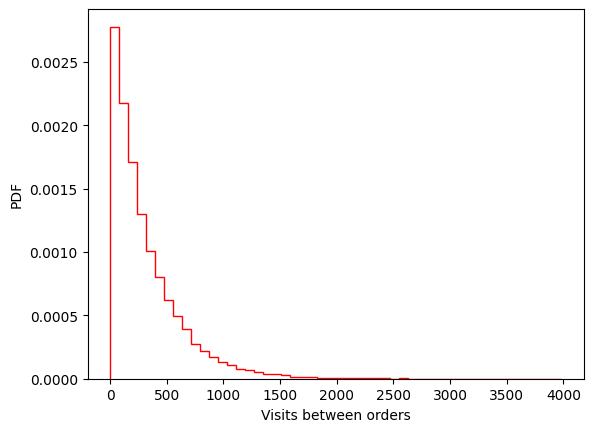

In [3]:
# set the seed for reproducability
np.random.seed(21)

# compute lambda, mean time (in units of number of visits) between orders.
lambda_ = np.mean(order_visits)

# draw 50,000 samples from an exponential distribution with the rate parameter lambda_
interval_time_btw_orders = np.random.exponential(scale = lambda_, size = 50000)

# plot the theoretical PDF along with the axes' label
plt.hist(interval_time_btw_orders, bins= 50, color='r',histtype='step', density=True)
plt.xlabel('Visits between orders')
plt.ylabel('PDF')

# show the plot
plt.show()

Note the shape of the distribution of the samples, it is maximum at 0 and decays as we go far from the origin, characteristic to the Exponential distribution.

## 2. Does the dataset actually follow an Exponential Distribution?

To answer this question we will create an empirical cumulative distribution function (eCDF) of the real data and compare it with the theoretical CDF (tCDF). If the two overlaps, we can that conclude that the Exponential distribution describes the observed data.

In order to draw such conclusion we will follow the following steps:

1. Create a eCDF function, and use it to compute CDF from the actual dataset (order_visits). 
2. We will use the same function to compute tCDF from the theoretical samples (interval_time_btw_orders).
3. Plot x_theor and y_theor  Then overlay the ECDF of the real data x and y as points.


In [4]:
# The empirical CDF is usually defined as
# CDF(x) = "number of samples <= x" / "number of samples"

def ecdf(data):
    """Computes CDF for a one-dimensional array."""
    n = len(data)    # Number of data points
    x = sorted(data) # x-data for the CDF
    y = np.arange(1, n+1)/n   # y-data for the CDF
    return x,y

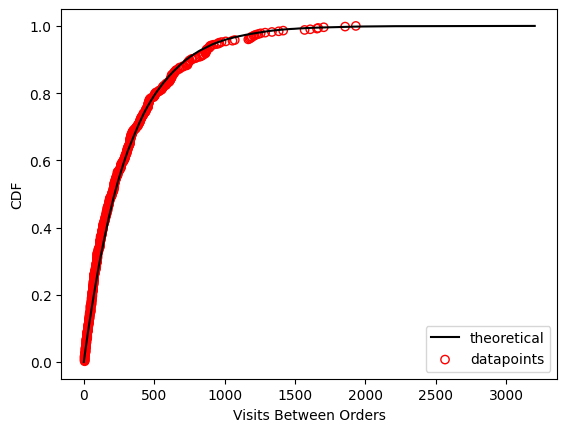

In [5]:
# create an eCDF from real data
x, y = ecdf(order_visits)

# create a tCDF from theoretical data
x_theor, y_theor = ecdf(interval_time_btw_orders)

# display theoretical values
plt.plot(x_theor,y_theor, color = 'black',label='theoretical')
# display data values
plt.scatter(x,y, facecolors='none', edgecolors='r', color= 'red', label='datapoints')

# define labels and display legend
plt.xlabel('Visits Between Orders')
plt.ylabel('CDF')
plt.legend()        

# plot the graph
plt.show()

It looks like visits result in orders (order_visits) are indeed Exponentially distributed since the dataset closely follows the theoretical cumulative distribution.

## 3. Is the lambda value we chose really the best value to define the distribution?
Let's test this we two different values for **lambda**:
1. 3 times the **lambda**
2. 1/3 of the  **lambda**

We will draw new samples using these values and ingest them to our eCDF function. Then plot them along with actual and theoretical sample obtained via  **lambda**.

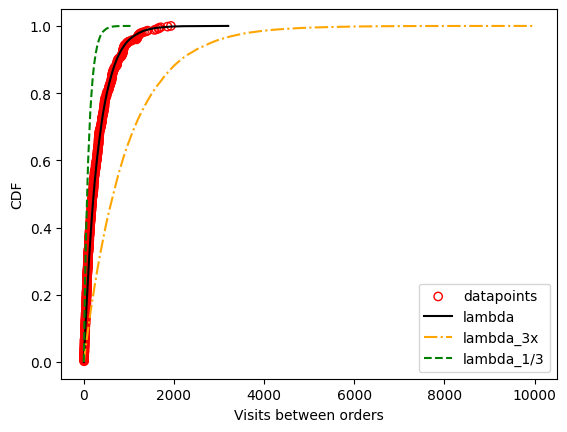

In [6]:
# recall lambda = np.mean(order_visits)
lambda_3x = lambda_*3
lambda_03 = lambda_*(1/3)

# draw 50000 samples out of an Exponential distribution with rate_parameter lambda_3x and rate_parameter lambda_03
interval_time_btw_orders_3x = np.random.exponential(lambda_3x,50000)
interval_time_btw_orders_03 = np.random.exponential(lambda_03,50000)


# Create a tCDFs from the two samples 
x_theor3x, y_theor3x = ecdf(interval_time_btw_orders_3x)
x_theor03, y_theor03 = ecdf(interval_time_btw_orders_03)


# display real data
plt.scatter(x,y, marker = 'o', facecolors='none', edgecolors='red', label='datapoints')

# display all theoretical samples
plt.plot(x_theor, y_theor,color='black', label='lambda')
plt.plot(x_theor3x, y_theor3x, color='orange',linestyle='-.', label='lambda_3x')
plt.plot(x_theor03, y_theor03, color='green',linestyle='--',label='lambda_1/3')

# labels and legend
plt.xlabel('Visits between orders')
plt.ylabel('CDF')
plt.legend()
plt.show()

Note that only the mean value of order_visits, i.e. **lambda**, fits the data almost perfectly. Therefore we can conclude that the mean of order_visits, is the best value for the rate parameter, **lambda**.